MNIST/CIFAR-10 Predictive Uncertainty Datasets

Copyright (c) 2018-2021 by Geir K. Nilsen (geir.kjetil.nilsen@gmail.com) and the University of Bergen.

Background: Fisher information based predictive epistemic uncertainty estimation was adapted to the deep learning classification context in [1]. We here provide datasets with predictive uncertainty based features, and invite the public to explore whether this additional information can be useful in deep learning classification. The models used to procure the datasets are identical to the two models in [1], and the uncertainty estimator used is the OPG estimator using K=1500 for MNIST and K=2500 for CIFAR-10.

As a starting point, this notebook briefly demonstrates how to use the datasets. We also show that the 'uncertainty score' distributions of True and False Positives are well separated.

File list: 
* mnist_stats_train.csv.gz : MNIST training set, N = 60000 examples (rows), 44 features (cols)
* mnist_stats_test.csv.gz : MNIST test set, N = 10000 examples (rows), 44 features (cols)
* cifar-10_stats_train.csv.gz : CIFAR-10 training set, N = 50000 examples (rows), 44 features (cols)
* cifar-10_stats_test.csv.gz : CIFAR-10 test set, N = 10000 examples (rows), 44 features (cols)

Features:
* f_0, f_1, ..., f_10 : class outputs in probability (float16)
* f_0_logits, f_1_logits, ..., f_10_logits : class output in logits (float16)
* sigma_0, sigma_1, ..., sigma_10 : standard devitation of class output in probability (float16)
* sigma_0_logits, sigma_1_logits, ..., sigma_10_logits : standard devitation of class output in probability (float16)
* sigma_score : 'uncertainty score' as defined in [1]. (float16)
* sigma_score_logits : 'uncertainty score' as defined in [1] in logits. (float16)
* TP : True Positive = 1 | False Positive = 0 (int8)
* y : Label (int8)

References:
[1] Epistemic Uncertainty Quantification in Deep Learning Classification by the Delta Method, https://arxiv.org/abs/1912.00832

In [1]:
# Display dataset mnist_stats_train.csv.gz
import pandas as pd
pd.set_option("display.precision", 2)
pd.options.display.float_format = '{:,.2f}'.format

df = pd.read_csv('data/mnist_stats_test.csv.gz')
df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,sigma_4_logits,sigma_5_logits,sigma_6_logits,sigma_7_logits,sigma_8_logits,sigma_9_logits,sigma_score,sigma_score_logits,TP,y
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.72,0.71,0.94,0.62,0.76,0.65,0.00,2.26,1,7
1,0.01,0.01,0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.92,0.88,0.85,0.93,0.76,1.02,0.02,2.72,1,2
2,0.00,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.48,0.54,0.50,0.46,0.45,0.57,0.00,1.56,1,1
3,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.78,0.73,0.71,0.83,0.81,0.75,0.00,2.50,1,0
4,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.51,0.70,0.63,0.65,0.66,0.59,0.00,2.10,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.95,1.00,1.07,0.76,0.81,0.96,0.00,2.79,1,2
9996,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.95,0.68,0.97,0.81,0.74,0.83,0.00,2.53,1,3
9997,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.55,0.72,0.75,0.65,0.58,0.62,0.00,2.17,1,4
9998,0.00,0.00,0.00,0.00,0.00,0.96,0.00,0.00,0.04,0.00,...,0.77,0.61,0.76,0.82,0.63,0.82,0.03,2.37,1,5


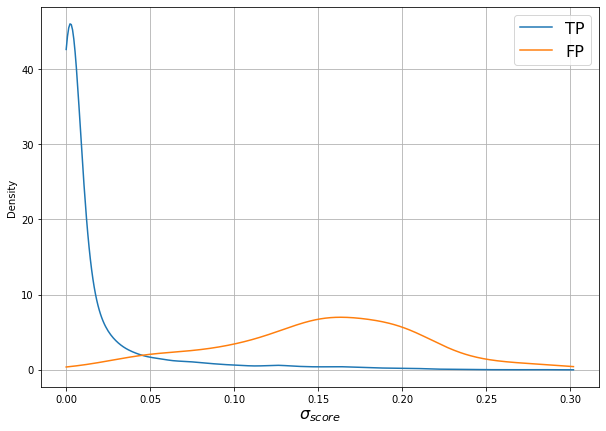

In [3]:
# Display 'uncertainty score' distributions for True Positives and False Positives (TP/FP)

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Filter rows by TP/FP
tp = (df[df['TP'] == 1]['sigma_score'])
fp = (df[df['TP'] == 0]['sigma_score'])

tpmin = tp.min()
tpmax = tp.max()
fpmin = fp.min()
fpmax = fp.max()

# Compute densities
x1 = np.linspace(tpmin, tpmax, 400)
x2 = np.linspace(fpmin, fpmax, 400)
x3 = np.linspace(np.minimum(tpmin,fpmin), np.maximum(tpmax,fpmax), 400)

tpkernel = stats.gaussian_kde(tp)
z1 = np.reshape(tpkernel(x3).T, x3.shape)

fpkernel = stats.gaussian_kde(fp)
z2 = np.reshape(fpkernel(x3).T, x3.shape)

# Display density
plt.figure(figsize=(10,7))
plt.plot(x3, z1, label='TP')
plt.plot(x3, z2, label='FP')
plt.xlabel('$\sigma_{score}$', fontsize=16)
plt.ylabel('Density')
plt.grid()
plt.legend(fontsize=16)